# Semester Project - Nextbike
## Task 1 - Exploration and Description

In [389]:
# import relevant libaries for data exploration 
import numpy as np 
import pandas as pd 
import datetime as dt
from datetime import timedelta

# import timeit to measure execution times
import timeit

#imports of folium for map visualization
import folium
from folium import plugins
from folium.plugins import HeatMap

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import Matplotlib Ticker to style axes of figures
import matplotlib.ticker as ticker



In [390]:
# reading the csv
df = pd.read_csv("Data/dortmund.csv", index_col=0)
df.head(5)

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
0,True,0,2019-01-20 00:00:00,52073,first,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
1,True,0,2019-01-20 23:59:00,52073,last,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
2,True,0,2019-01-20 00:00:00,52331,first,113573,2,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
3,True,0,2019-01-20 23:59:00,52331,last,113573,4,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
4,True,0,2019-01-20 00:00:00,31346,first,113543,3,51.523351,4,Brackel Kirche,7337,7.546867,False


In [ ]:
len(df[df[]])

In [391]:
df = df[df['p_number'] != 0]
df

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
0,True,0,2019-01-20 00:00:00,52073,first,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
1,True,0,2019-01-20 23:59:00,52073,last,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
2,True,0,2019-01-20 00:00:00,52331,first,113573,2,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
3,True,0,2019-01-20 23:59:00,52331,last,113573,4,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
4,True,0,2019-01-20 00:00:00,31346,first,113543,3,51.523351,4,Brackel Kirche,7337,7.546867,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669647,True,0,2019-12-31 22:37:00,500113,start,50380,7,51.510976,71,Stadtgarten,7316,7.464534,False
669648,True,0,2019-12-31 23:05:00,500113,end,7161426,4,51.486747,71,Am Beilstück,7371,7.435750,False
669649,True,0,2019-12-31 23:38:00,500113,start,7161426,5,51.486747,71,Am Beilstück,7371,7.435750,False
669650,True,0,2019-12-31 23:52:00,500113,end,113563,1,51.502318,71,Kreuzstraße,7353,7.450029,False


In [392]:
df.dtypes

p_spot          bool   
p_place_type    int64  
datetime        object 
b_number        int64  
trip            object 
                 ...   
b_bike_type     int64  
p_name          object 
p_number        int64  
p_lng           float64
p_bike          bool   
Length: 13, dtype: object

In [393]:
df.loc[:,'datetime'] = pd.to_datetime(df.loc[:, 'datetime'])

In [394]:
df.dtypes

p_spot          bool          
p_place_type    int64         
datetime        datetime64[ns]
b_number        int64         
trip            object        
                 ...          
b_bike_type     int64         
p_name          object        
p_number        int64         
p_lng           float64       
p_bike          bool          
Length: 13, dtype: object

### Create df with bike numbers of every station

#### create a column for every station in the dataset

In [395]:
stationlist = df['p_name'].unique()
stationlist

array(['FH-Dortmund Sonnenstraße', 'Universität/S-Bahnhof',
       'Brackel Kirche', 'Hainallee / Südbad',
       'TU Dortmund Emil-Figge-Straße 50', 'Westentor',
       'Hauptbahnhof/Bahnhofsvorplatz', 'Unionstr.', 'Heiligegartenstr.',
       'Ritterhausstr.', 'Polizeipräsidium', 'Schwanenwall',
       'Wittener Str. / Wilhelmplatz', 'Borsigplatz / Oesterholzstr.',
       'Hörde Bahnhof', 'Hiltropwall', 'Phoenix See / Hörder Burg',
       'Hansastr.', 'Germania/S-Bahnhof', 'Möllerbrücke',
       'Städtische Kliniken', 'Dortmund West/S-Bahnhof',
       'Am Kaiserbrunnen', 'Kuckelke', 'Vinckeplatz', 'Cinestar',
       'Karl-Liebknecht-Str.', 'Steigenberger Hotel / Berswordtstr.',
       'Hauptfriedhof', 'Kuithanstr.', 'Platz von Netanya',
       'Westfalenhalle', 'Jugendhotel ', 'Geschwister-Scholl-Str.',
       'Saarlandstr. / Hohe Str.', 'Priorstr. / Münsterstr.', 'Wißstr.',
       'Volksbank', 'RWE Tower', 'Stadthaus',
       'TU Dortmund Hörsaalgebäude 2', 'Märkische Str. / B1',
   

#### Create df with hourly timestamps

In [396]:
station_bikenumbers = pd.DataFrame(np.arange('2019-01-20', '2019-12-31', dtype='datetime64[h]'), columns = ['time'])

In [397]:
station_bikenumbers['time'] = station_bikenumbers['time'].dt.strftime('%Y-%m-%d-%H')

In [398]:
station_bikenumbers

,time
0,2019-01-20-00
1,2019-01-20-01
2,2019-01-20-02
3,2019-01-20-03
4,2019-01-20-04
...,...
8275,2019-12-30-19
8276,2019-12-30-20
8277,2019-12-30-21
8278,2019-12-30-22


In [399]:
for station in stationlist: 
    station_bikenumbers[station] = np.NaN

In [400]:
station_bikenumbers = station_bikenumbers.set_index('time')

In [401]:
station_bikenumbers

,FH-Dortmund Sonnenstraße,Universität/S-Bahnhof,Brackel Kirche,Hainallee / Südbad,TU Dortmund Emil-Figge-Straße 50,Westentor,Hauptbahnhof/Bahnhofsvorplatz,Unionstr.,Heiligegartenstr.,Ritterhausstr.,Polizeipräsidium,Schwanenwall,Wittener Str. / Wilhelmplatz,Borsigplatz / Oesterholzstr.,Hörde Bahnhof,Hiltropwall,Phoenix See / Hörder Burg,Hansastr.,Germania/S-Bahnhof,Möllerbrücke,Städtische Kliniken,Dortmund West/S-Bahnhof,Am Kaiserbrunnen,Kuckelke,Vinckeplatz,Cinestar,Karl-Liebknecht-Str.,Steigenberger Hotel / Berswordtstr.,Hauptfriedhof,Kuithanstr.,Platz von Netanya,Westfalenhalle,Jugendhotel,Geschwister-Scholl-Str.,Saarlandstr. / Hohe Str.,Priorstr. / Münsterstr.,Wißstr.,Volksbank,RWE Tower,Stadthaus,TU Dortmund Hörsaalgebäude 2,Märkische Str. / B1,FH-Dortmund Emil-Figge-Straße 42,Phönix West,Oespel S-Bahnhof,Von-der-Tann-Str.,Voßkuhle,Gerichtsplatz,Hauptbahnhof Nordausgang,Rombergpark,Stadtgarten,Westfalenpark,Friedensplatz,Kreuzstraße,Heiliger Weg / Kronprinzenstr.,Markgrafenstr.,Berliner Str.,TU Dortmund Seminarraumgebäude 1,Technologiepark,Kampstr. / Freistuhl,Max-Ophüls-Platz,Otto-Hahn-Str.,Nortkirchenstraße/Wilo,Westfalenpark / Am Kaiserhain,Körne West/S-Bahnhof,Platz am Südwall,Kronenburg,Lütgendortmund / Bus-Bahnhof,Am Beilstück,Barop Parkhaus,An der Palmweide,Hombruch Marktplatz,Schützenstrasse,Nordmarkt,Hafen,Immermannstr./Klinikzentrum,Emil-Figge-Strasse 9,Baroper Strasse,Meitnerweg,Ostenberg,Sunderweg,Marten S-Bahnhof,DEKT - Westfalenhallen,DEKT - HaKa-Schule,DEKT -Warsteiner Music Hall,DEKT - St. Franziskus,DEKT - Zentrum Jugend,DEKT - St.Ewaldi,Campus Süd H-Bahn,DEKT - FZW,DEKT - DASA,DEKT - Zentrum Kinder,Kanal / Alter Erlenweg,Rüschebrinkstrasse,CCC Dortmund,Fridays for Future!,Dorstfeld Süd S-Bahnhof,Am Gardenkamp,Bergmann Kiosk,Bergmann Stehbierhalle
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-20-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,..

### Fill station_bikenumber list by going through the eventlog

In [402]:
df

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
0,True,0,2019-01-20 00:00:00,52073,first,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
1,True,0,2019-01-20 23:59:00,52073,last,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
2,True,0,2019-01-20 00:00:00,52331,first,113573,2,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
3,True,0,2019-01-20 23:59:00,52331,last,113573,4,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
4,True,0,2019-01-20 00:00:00,31346,first,113543,3,51.523351,4,Brackel Kirche,7337,7.546867,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669647,True,0,2019-12-31 22:37:00,500113,start,50380,7,51.510976,71,Stadtgarten,7316,7.464534,False
669648,True,0,2019-12-31 23:05:00,500113,end,7161426,4,51.486747,71,Am Beilstück,7371,7.435750,False
669649,True,0,2019-12-31 23:38:00,500113,start,7161426,5,51.486747,71,Am Beilstück,7371,7.435750,False
669650,True,0,2019-12-31 23:52:00,500113,end,113563,1,51.502318,71,Kreuzstraße,7353,7.450029,False


In [403]:
for index, row in df.iterrows():
    #station_bikenumbers.at[df[df['datetime'] == row.get(key = 'datetime')][['datetime']], df[df['datetime'] == row.get(key = 'datetime')][['datetime']]]
    #timestamp = np.datetime64(row.get(key = 'datetime'), 'h')
    #timestamp = pd.to_datetime(str(row.get(key = 'datetime')))
    #timestamp = timestamp.strftime('%Y-%m-%d-%H')
    timestamp = pd.to_datetime(row.get(key = 'datetime')).ceil('H').strftime('%Y-%m-%d-%H')
    station_bikenumbers.at[timestamp, row.get(key = 'p_name')] = pd.to_numeric(row.get(key = 'p_bikes'))

In [404]:
station_bikenumbers

,FH-Dortmund Sonnenstraße,Universität/S-Bahnhof,Brackel Kirche,Hainallee / Südbad,TU Dortmund Emil-Figge-Straße 50,Westentor,Hauptbahnhof/Bahnhofsvorplatz,Unionstr.,Heiligegartenstr.,Ritterhausstr.,Polizeipräsidium,Schwanenwall,Wittener Str. / Wilhelmplatz,Borsigplatz / Oesterholzstr.,Hörde Bahnhof,Hiltropwall,Phoenix See / Hörder Burg,Hansastr.,Germania/S-Bahnhof,Möllerbrücke,Städtische Kliniken,Dortmund West/S-Bahnhof,Am Kaiserbrunnen,Kuckelke,Vinckeplatz,Cinestar,Karl-Liebknecht-Str.,Steigenberger Hotel / Berswordtstr.,Hauptfriedhof,Kuithanstr.,Platz von Netanya,Westfalenhalle,Jugendhotel,Geschwister-Scholl-Str.,Saarlandstr. / Hohe Str.,Priorstr. / Münsterstr.,Wißstr.,Volksbank,RWE Tower,Stadthaus,TU Dortmund Hörsaalgebäude 2,Märkische Str. / B1,FH-Dortmund Emil-Figge-Straße 42,Phönix West,Oespel S-Bahnhof,Von-der-Tann-Str.,Voßkuhle,Gerichtsplatz,Hauptbahnhof Nordausgang,Rombergpark,Stadtgarten,Westfalenpark,Friedensplatz,Kreuzstraße,Heiliger Weg / Kronprinzenstr.,Markgrafenstr.,Berliner Str.,TU Dortmund Seminarraumgebäude 1,Technologiepark,Kampstr. / Freistuhl,Max-Ophüls-Platz,Otto-Hahn-Str.,Nortkirchenstraße/Wilo,Westfalenpark / Am Kaiserhain,Körne West/S-Bahnhof,Platz am Südwall,Kronenburg,Lütgendortmund / Bus-Bahnhof,Am Beilstück,Barop Parkhaus,An der Palmweide,Hombruch Marktplatz,Schützenstrasse,Nordmarkt,Hafen,Immermannstr./Klinikzentrum,Emil-Figge-Strasse 9,Baroper Strasse,Meitnerweg,Ostenberg,Sunderweg,Marten S-Bahnhof,DEKT - Westfalenhallen,DEKT - HaKa-Schule,DEKT -Warsteiner Music Hall,DEKT - St. Franziskus,DEKT - Zentrum Jugend,DEKT - St.Ewaldi,Campus Süd H-Bahn,DEKT - FZW,DEKT - DASA,DEKT - Zentrum Kinder,Kanal / Alter Erlenweg,Rüschebrinkstrasse,CCC Dortmund,Fridays for Future!,Dorstfeld Süd S-Bahnhof,Am Gardenkamp,Bergmann Kiosk,Bergmann Stehbierhalle
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-20-00,1.0,2.0,3.0,5.0,NaN,3.0,5.0,1.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,NaN,5.0,3.0,1.0,1.0,NaN,5.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,3.0,1.0,1.0,3.0,NaN,5.0,2.0,NaN,1.0,1.0,1.0,1.0,5.0,3.0,2.0,NaN,NaN,5.0,NaN,5.0,NaN,2.0,3.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20-01,NaN,3.0,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20-03,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-20-04,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,..

### Fill NaN values with last available value

In [405]:
station_bikenumbers.dtypes

FH-Dortmund Sonnenstraße            float64
Universität/S-Bahnhof               float64
Brackel Kirche                      float64
Hainallee / Südbad                  float64
TU Dortmund Emil-Figge-Straße 50    float64
                                     ...   
Fridays for Future!                 float64
Dorstfeld Süd S-Bahnhof             float64
Am Gardenkamp                       float64
Bergmann Kiosk                      float64
Bergmann Stehbierhalle              float64
Length: 100, dtype: object

In [406]:
station_bikenumbers.fillna(method='ffill', inplace=True)
station_bikenumbers.fillna(value='0.0', inplace=True)

station_bikenumbers

,FH-Dortmund Sonnenstraße,Universität/S-Bahnhof,Brackel Kirche,Hainallee / Südbad,TU Dortmund Emil-Figge-Straße 50,Westentor,Hauptbahnhof/Bahnhofsvorplatz,Unionstr.,Heiligegartenstr.,Ritterhausstr.,Polizeipräsidium,Schwanenwall,Wittener Str. / Wilhelmplatz,Borsigplatz / Oesterholzstr.,Hörde Bahnhof,Hiltropwall,Phoenix See / Hörder Burg,Hansastr.,Germania/S-Bahnhof,Möllerbrücke,Städtische Kliniken,Dortmund West/S-Bahnhof,Am Kaiserbrunnen,Kuckelke,Vinckeplatz,Cinestar,Karl-Liebknecht-Str.,Steigenberger Hotel / Berswordtstr.,Hauptfriedhof,Kuithanstr.,Platz von Netanya,Westfalenhalle,Jugendhotel,Geschwister-Scholl-Str.,Saarlandstr. / Hohe Str.,Priorstr. / Münsterstr.,Wißstr.,Volksbank,RWE Tower,Stadthaus,TU Dortmund Hörsaalgebäude 2,Märkische Str. / B1,FH-Dortmund Emil-Figge-Straße 42,Phönix West,Oespel S-Bahnhof,Von-der-Tann-Str.,Voßkuhle,Gerichtsplatz,Hauptbahnhof Nordausgang,Rombergpark,Stadtgarten,Westfalenpark,Friedensplatz,Kreuzstraße,Heiliger Weg / Kronprinzenstr.,Markgrafenstr.,Berliner Str.,TU Dortmund Seminarraumgebäude 1,Technologiepark,Kampstr. / Freistuhl,Max-Ophüls-Platz,Otto-Hahn-Str.,Nortkirchenstraße/Wilo,Westfalenpark / Am Kaiserhain,Körne West/S-Bahnhof,Platz am Südwall,Kronenburg,Lütgendortmund / Bus-Bahnhof,Am Beilstück,Barop Parkhaus,An der Palmweide,Hombruch Marktplatz,Schützenstrasse,Nordmarkt,Hafen,Immermannstr./Klinikzentrum,Emil-Figge-Strasse 9,Baroper Strasse,Meitnerweg,Ostenberg,Sunderweg,Marten S-Bahnhof,DEKT - Westfalenhallen,DEKT - HaKa-Schule,DEKT -Warsteiner Music Hall,DEKT - St. Franziskus,DEKT - Zentrum Jugend,DEKT - St.Ewaldi,Campus Süd H-Bahn,DEKT - FZW,DEKT - DASA,DEKT - Zentrum Kinder,Kanal / Alter Erlenweg,Rüschebrinkstrasse,CCC Dortmund,Fridays for Future!,Dorstfeld Süd S-Bahnhof,Am Gardenkamp,Bergmann Kiosk,Bergmann Stehbierhalle
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-20-00,1.0,2.0,3.0,5.0,0.0,3.0,5.0,1.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,1.0,0.0,5.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,3.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-20-01,1.0,3.0,4.0,5.0,0.0,3.0,5.0,1.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,2.0,1,5.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,3.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-20-02,1.0,3.0,4.0,5.0,0.0,3.0,5.0,2.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,3.0,1,5.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-20-03,1.0,3.0,4.0,5.0,0.0,3.0,5.0,3.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,3.0,1,5.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-20-04,1.0,3.0,4.0,5.0,0.0,3.0,5.0,3.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,3.0,1,5.0,5.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,..

 ### Generate a Station list with geo coordinates

In [407]:
stationlist = df[['p_name', 'p_number', 'p_lat', 'p_lng']].drop_duplicates(subset ="p_name")
stationlist.set_index('p_name')


,p_number,p_lat,p_lng
p_name,,,
FH-Dortmund Sonnenstraße,7374,51.506613,7.455587
Universität/S-Bahnhof,7362,51.492690,7.417633
Brackel Kirche,7337,51.523351,7.546867
Hainallee / Südbad,7351,51.506312,7.470531
TU Dortmund Emil-Figge-Straße 50,7367,51.493966,7.418008
...,...,...,...
Fridays for Future!,7724,51.519577,7.400382
Dorstfeld Süd S-Bahnhof,7382,51.501927,7.419553
Am Gardenkamp,7383,51.481319,7.414860


### Visualization of one moment

In [408]:
station_bikenumbers

,FH-Dortmund Sonnenstraße,Universität/S-Bahnhof,Brackel Kirche,Hainallee / Südbad,TU Dortmund Emil-Figge-Straße 50,Westentor,Hauptbahnhof/Bahnhofsvorplatz,Unionstr.,Heiligegartenstr.,Ritterhausstr.,Polizeipräsidium,Schwanenwall,Wittener Str. / Wilhelmplatz,Borsigplatz / Oesterholzstr.,Hörde Bahnhof,Hiltropwall,Phoenix See / Hörder Burg,Hansastr.,Germania/S-Bahnhof,Möllerbrücke,Städtische Kliniken,Dortmund West/S-Bahnhof,Am Kaiserbrunnen,Kuckelke,Vinckeplatz,Cinestar,Karl-Liebknecht-Str.,Steigenberger Hotel / Berswordtstr.,Hauptfriedhof,Kuithanstr.,Platz von Netanya,Westfalenhalle,Jugendhotel,Geschwister-Scholl-Str.,Saarlandstr. / Hohe Str.,Priorstr. / Münsterstr.,Wißstr.,Volksbank,RWE Tower,Stadthaus,TU Dortmund Hörsaalgebäude 2,Märkische Str. / B1,FH-Dortmund Emil-Figge-Straße 42,Phönix West,Oespel S-Bahnhof,Von-der-Tann-Str.,Voßkuhle,Gerichtsplatz,Hauptbahnhof Nordausgang,Rombergpark,Stadtgarten,Westfalenpark,Friedensplatz,Kreuzstraße,Heiliger Weg / Kronprinzenstr.,Markgrafenstr.,Berliner Str.,TU Dortmund Seminarraumgebäude 1,Technologiepark,Kampstr. / Freistuhl,Max-Ophüls-Platz,Otto-Hahn-Str.,Nortkirchenstraße/Wilo,Westfalenpark / Am Kaiserhain,Körne West/S-Bahnhof,Platz am Südwall,Kronenburg,Lütgendortmund / Bus-Bahnhof,Am Beilstück,Barop Parkhaus,An der Palmweide,Hombruch Marktplatz,Schützenstrasse,Nordmarkt,Hafen,Immermannstr./Klinikzentrum,Emil-Figge-Strasse 9,Baroper Strasse,Meitnerweg,Ostenberg,Sunderweg,Marten S-Bahnhof,DEKT - Westfalenhallen,DEKT - HaKa-Schule,DEKT -Warsteiner Music Hall,DEKT - St. Franziskus,DEKT - Zentrum Jugend,DEKT - St.Ewaldi,Campus Süd H-Bahn,DEKT - FZW,DEKT - DASA,DEKT - Zentrum Kinder,Kanal / Alter Erlenweg,Rüschebrinkstrasse,CCC Dortmund,Fridays for Future!,Dorstfeld Süd S-Bahnhof,Am Gardenkamp,Bergmann Kiosk,Bergmann Stehbierhalle
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-20-00,1.0,2.0,3.0,5.0,0.0,3.0,5.0,1.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,1.0,0.0,5.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,3.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-20-01,1.0,3.0,4.0,5.0,0.0,3.0,5.0,1.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,2.0,1,5.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,3.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-20-02,1.0,3.0,4.0,5.0,0.0,3.0,5.0,2.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,3.0,1,5.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-20-03,1.0,3.0,4.0,5.0,0.0,3.0,5.0,3.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,3.0,1,5.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-20-04,1.0,3.0,4.0,5.0,0.0,3.0,5.0,3.0,5.0,4.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0,3.0,1.0,3.0,1,5.0,5.0,1.0,3.0,1.0,3.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,0.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,..

In [411]:
data = station_bikenumbers.loc['2019-12-31-11']

Text(0.5, 1.06, 'Hourly Demand splitted by season')

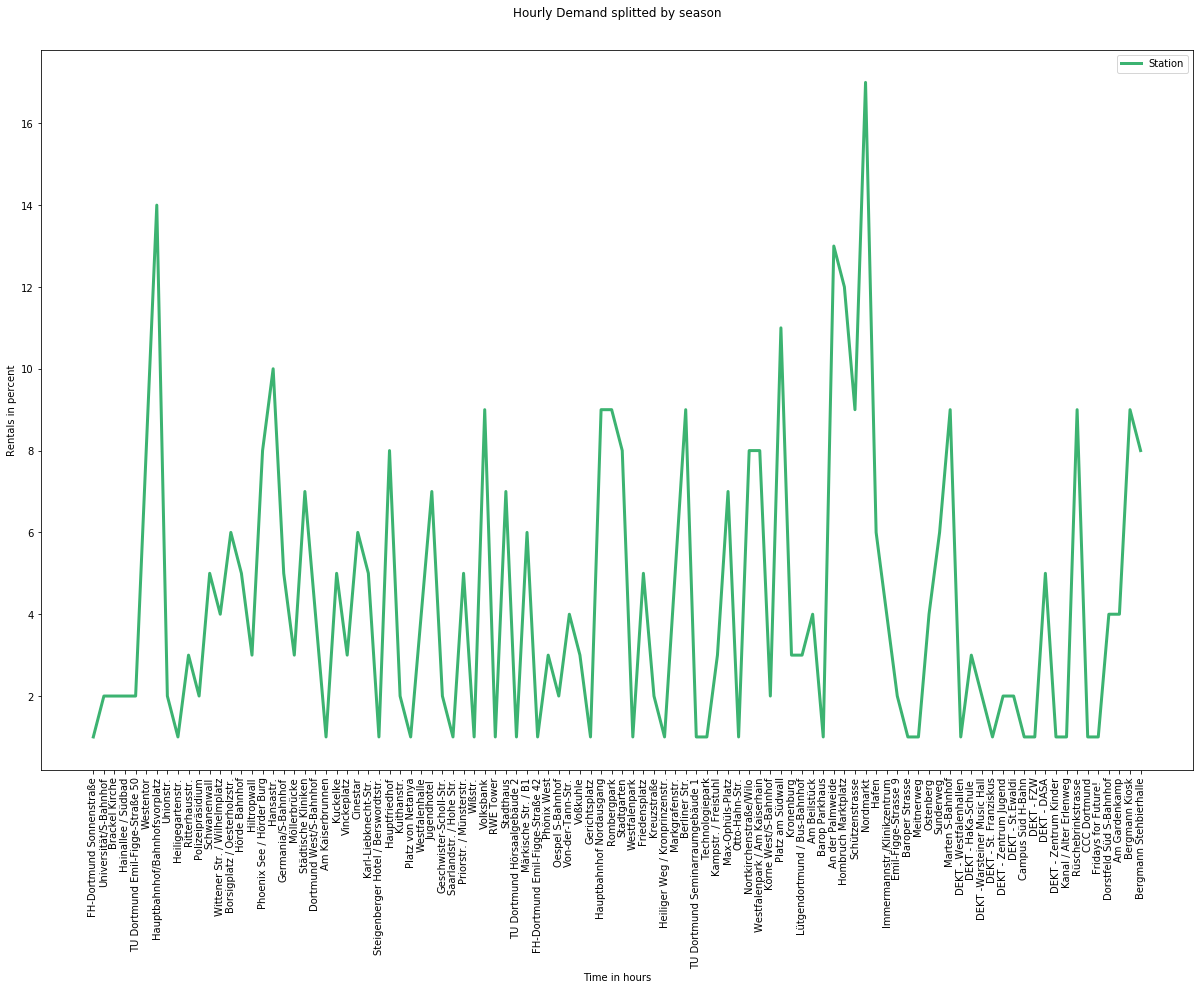

In [412]:
# Visualize relative hourly demand per season
fig = plt.figure(figsize=(16, 10))
ax = fig.add_axes([0,0,1,1])

ax.plot(data.index, data, label="Station", color='mediumseagreen', linewidth=3)

ax.legend(loc=0)

ax.set_xlabel('Time in hours')
ax.set_ylabel('Rentals in percent')

plt.xticks(rotation=90)
#format y-axis to have a thousands seperator
#fig.gca().get_yaxis().set_major_formatter(
#ticker.FuncFormatter(lambda x, p: int(round(x * 100))))

fig.suptitle('Hourly Demand splitted by season', y='1.06')

Text(0.5, 1.06, 'Hourly Demand splitted by season')

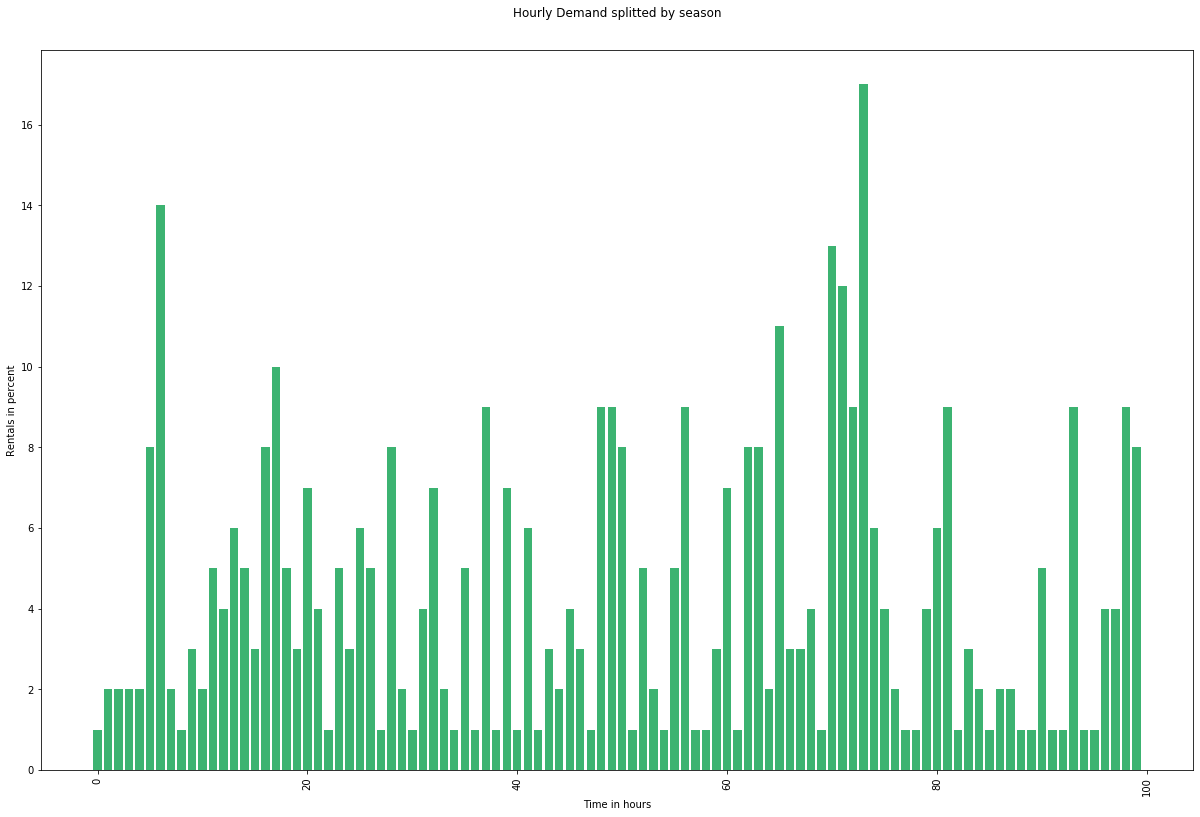

In [413]:
# Visualize relative hourly demand per season
fig = plt.figure(figsize=(16, 10))
ax = fig.add_axes([0,0,1,1])

ax.bar(height=data, label=data.index, x=np.arange(0, 100), color='mediumseagreen')

ax.set_xlabel('Time in hours')
ax.set_ylabel('Rentals in percent')

plt.xticks(rotation=90)

fig.suptitle('Hourly Demand splitted by season', y='1.06')
             

#### Track bikes

In [93]:
bikelist = df['b_number_start'].unique()

bikelist = bikelist[1:3]

bikelist

array([50425, 53006], dtype=int64)

In [105]:
for bikenumber in bikelist:
    biketrips = df[df['b_number_start'] == bikenumber]
    start = np.datetime64('2020-01-01', dtype='datetime64')
    end = np.datetime64('2020-01-02', dtype='datetime64')
    for trip in biketrips.index[::-1]:
        end = biketrips[biketrips.index == trip].loc[:,'datetime_end']
        staytimespan = np.arange(start.dt.strftime('%Y-%m-%d-%h'), end.dt.strftime('%Y-%m-%d-%h'), dtype='datetime64[h]')
        print(staytimespan)

AttributeError: 'numpy.datetime64' object has no attribute 'dt'

In [76]:
df[df['b_number_start'] == 50641].index

Int64Index([    0,   366,   554,   555,   556,   557,   874,   875,  1208,
             1209,
            ...
            32308, 32309, 32310, 32311, 32312, 32565, 32566, 32567, 32568,
            32569],
           dtype='int64', length=172)

### get earliest use per bike

In [ ]:
bikelist = df['b_number_start'].unique()
stationslist

In [ ]:
for 

In [13]:
stations_map = folium.Map(location=[51.514061,7.465727], zoom_start=13)

In [14]:
stations_map

In [ ]:
stations_map = folium.Map(location=[52.505640,13.40000], zoom_start=12)

for index, row in stations.iterrows():
    
    station_rank = str(row.name + 1)
    station_rentals = str(round(row['count']*12661,-1))
    
    if isinstance((row['NAME']), str):
        station_name = str(row['NAME'])
    
    if not isinstance((row['NAME']), str):
        station_name = 'Name not available'
        
    station_info = "{}\nRank: {}\nRentals over 2 years: {}\n".format(station_name,station_rank,station_rentals)
    folium.Circle(
        location=[row['latitude'],row['longitude']],
        popup=station_info,
        radius=row['count']*200,
        color='#6495ed',
        fill=True,
        fill_color='#6495ed'
    ).add_to(stations_map)
                  
stations_map